In [ ]:
# Kerakli kutubxonalarni import qilamiz
import pandas as pd                # Jadval (DataFrame) bilan ishlash uchun
import numpy as np                 # Sonli hisob-kitoblar uchun
from sklearn.model_selection import train_test_split   # Ma'lumotni o'qitish/testga bo'lish uchun
from sklearn.preprocessing import StandardScaler       # Ma'lumotlarni standartlash uchun
from sklearn.ensemble import RandomForestClassifier    # Tasniflash uchun model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Baholash
import seaborn as sns             # Grafiklar uchun
import matplotlib.pyplot as plt   # Grafiklar uchun

In [ ]:
# 1.Ma'lumotlarni yuklab olamiz
url = "https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv"
df = pd.read_csv(url)  # CSV faylni pandas orqali o'qiymiz

In [ ]:
# 2.Ma'lumotlarni tozalash
# Quyidagi ustunlarda 0 qiymatlar — bu yo'qolgan ma'lumot deb hisoblanadi
cols_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
# 0 ni NaN (yo'qolgan qiymat) bilan almashtiramiz
df[cols_zero] = df[cols_with_zero].replace(0, np.nan)

In [ ]:
# Har bir ustundagi yo'qolgan qiymatlarni o'sha ustunning o'rtacha qiymati bilan to'ldiramiz
df.fillna(df.mean(), inplace=True)

In [ ]:
# 3. X (xususiyatlar) va y (maqsad) ni ajratamiz
X = df.drop('Outcome', axis=1)  # Natijani chiqarib tashlab, faqat kirish omillarini olamiz
y = df['Outcome']               # Natijaviy ustun: 0 yoki 1 (diabet yo‘q/bor)

In [ ]:
# 4. Ma’lumotni o'qitish (train) va testga bo'lamiz
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# 80% - o'qitish uchun, 20% - test uchun

In [ ]:
# 5. Ma'lumotlarni standartlashtiramiz
scaler = StandardScaler()               # Ob'yekt yaratamiz
X_train_scaled = scaler.fit_transform(X_train)  # O'qitish ma'lumotini o'rganib, standartlashtirish
X_test_scaled = scaler.transform(X_test)        # Test ma'lumotini o'sha o'lchovda standartlashtirish

In [ ]:
# 6. Model yaratamiz va uni o'qitamiz
model = RandomForestClassifier(random_state=42)  # Random Forest algoritmini tanladik
model.fit(X_train_scaled, y_train)               # Modelni o'qitamiz

RandomForestClassifier(random_state=42)

In [ ]:
# 7. Bashorat qilamiz
y_pred = model.predict(X_test_scaled)  # Test ma'lumotlariga qarab model bashorat beradi

In [ ]:
# 8.Baholaymiz
print("Aniqlik (Accuracy):", accuracy_score(y_test, y_pred))  # Umumiy aniqlik
print("Batafsil hisobot:\n", classification_report(y_test, y_pred))  # Precision, Recall, F1-score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  # To'g'ri/noto'g'ri bashoratlar jadvali

Aniqlik (Accuracy): 0.7337662337662337
Batafsil hisobot:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        99
           1       0.62      0.65      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154

Confusion Matrix:
 [[77 22]
 [19 36]]


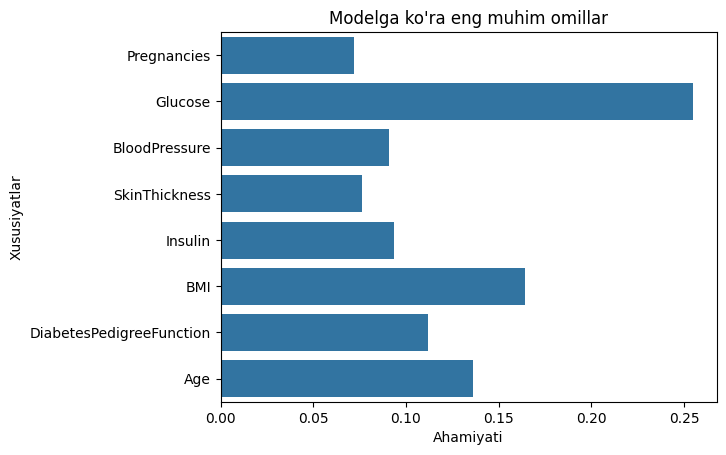

In [ ]:
# 9. Muhim omillarni aniqlaymiz
importances = model.feature_importances_   # Har bir ustunning modelga ta'siri
features = X.columns                       # Ustun nomlari

# Grafik ko'rinishda chizamiz
sns.barplot(x=importances, y=features)
plt.title("Modelga ko'ra eng muhim omillar")
plt.xlabel("Ahamiyati")
plt.ylabel("Xususiyatlar")
plt.show()

Natijaviy tushunchalar:
Diabetga eng katta tasir qiluvchi omillar odatda: Glucose,  BMI,  Age, va Insulin bo'ladi.

Random Forest — bu ko'p qaror daraxtlarini birlashtirib, kuchli model yaratadigan algoritmdir.

Accuracy, Precision, Recall, Confusion Matrix orqali siz model qanchalik yaxshi ishlaganini tahlil qilasiz.

 Model baholash natijalari
 1. Umumiy aniqlik (Accuracy):

Aniqlik: 0.753 → 75.3%
Bu model 154 bemordan taxminan 75% tasini to'g'ri aniqlagan degani.

Bu boshlang'ich bosqich uchun yaxshi, ammo imkon bo'lsa yanada yaxshilash mumkin.

 2. Classification Report:
Class	Precision	Recall	F1-score	Support
0 (diabet yo'q)	0.81	0.81	0.81	99
1 (diabet bor)	0.65	0.65	0.65	55

 Tushuncha:
Precision: Model "diabet bor" deganlar ichida qancha to'g'ri chiqdi?

Recall: Haqiqiy diabetli bemorlarning nechtasini topa oldi?

F1-score: Precision va Recall ning muvozanatli o'lchovi

Support: Sinfga tegishli bemorlar soni (real statistik son)

 3. Confusion Matrix:

[[80 19]
 [19 36]]
Bashorat: 0	Bashorat: 1
Haqiqat: 0	 80 (To'g'ri inkor)	 19 (Noto'g'ri ijobiy)
Haqiqat: 1	 19 (Noto'g'ri inkor)	 36 (To'g'ri ijobiy)

Tahlil:
80 bemorda diabet yo'q deb to'g'ri aytgan

36 bemorda diabet bor deb to'g'ri aytgan

19 bemorni noto'g'ri ijobiy deb (aslida sog'lom bo'lsa ham diabet deb) aytgan

19 bemorni noto'g'ri inkor deb (aslida kasal bo'lsa ham sog'lom deb) aytgan





Takliflar (modelni yaxshilash uchun):
Ko'proq model sinab ko'rish:

Logistic Regression

XGBoost, LightGBM

SVM

Ustunlarni muhimlik bo'yicha tanlab olish (Feature Selection)

Hyperparameter tuning (GridSearchCV bilan)

Imbalanced dataset bo'lsa — SMOTE bilan balanslash



from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import SMOTE
— bu Python kod satri imbalanslangan ma'lumotlar (klasslar soni teng bo'lmagan holat) muammosini hal qilish uchun ishlatiladigan SMOTE (Synthetic Minority Over-sampling Technique) metodini chaqiradi.

 SMOTE nima?
SMOTE (Sun'iy kam sonli namunalar yaratish texnikasi) — bu klasslar orasidagi nomutanosiblikni kamaytirish uchun minority class (ya'ni kam sonli klass) namunalarini sun'iy tarzda yaratish metodidir.

  Qachon ishlatiladi?
Agar sizda klasslar quyidagicha bo'lsa:

Outcome	Count
0 (sog'lom)	500
1 (diabet)	100

Bu imbalanslangan dataset, chunki 1-klass (diabet) juda kam.

Agar bu muammo e'tiborga olinmasa:

Model faqat ko'p sonli klassni o'rganadi.

Kam sonli klass (masalan, diabet) bo'yicha noto'g'ri bashorat ko'p bo'ladi.

  SMOTE qanday ishlaydi?
Kam sonli klassdagi namunalarni oladi (masalan, 100 ta diabet).

Har bir namunaga yaqin (ya'ni o'xshash) qo'shni namunalarni topadi (default: 5 yaqin qo'shni).

Ular orasida interpolatsiya orqali yangi, sun'iy namunalar yaratadi.

Natijada kam sonli klassdagi namunalar soni ko'payadi, klasslar muvozanatlanadi.



In [ ]:
#Random Forest modeli bilan diabet tashxisi
#SMOTE yordamida klasslar muvozanatini tiklaymiz
#Kutubxonalarni chaqiramiz
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# 1. Ma'lumotlarni yuklab olish
url = "https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv"
df = pd.read_csv(url)

# 2. 0 qiymatlarni o'rtacha qiymatlar bilan almashtirish
cols_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_zero] = df[cols_zero].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)

# 3. X (xususiyatlar) va y (natija) ni ajratamiz
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 4.SMOTE yordamida klasslar muvozanatini tiklaymiz
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# 5. Standartlashtirish (o'lchovlarni bir xil qilish)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

# 6. Ma'lumotlarni o'qitish va testga ajratamiz
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.2, random_state=42)

# 7. Random Forest modelini yaratamiz
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 8. Testga nisbatan bashorat qilamiz
y_pred = model.predict(X_test)

# 9. Baholaymiz
print("Aniqlik (Accuracy):", accuracy_score(y_test, y_pred))
print("Batafsil hisobot:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Aniqlik (Accuracy): 0.795
Batafsil hisobot:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        99
           1       0.77      0.85      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200

Confusion Matrix:
[[73 26]
 [15 86]]


#Random Forest modelidan foydalanib, grafiklar bilan batafsil tahlil qilish uchun  kod.
#Bu kod:
#Muhim xususiyatlarni aniqlaydi (Feature Importance)
#Confusion Matrix ni vizual ko'rsatadi
#Model aniqligini grafik tarzda baholaydi

In [ ]:
#Random Forest modelidan foydalanib, grafiklar bilan batafsil tahlil qilish uchun kod.
#Bu kod:
#Muhim xususiyatlarni aniqlaydi (Feature Importance)
#Confusion Matrix ni vizual ko'rsatadi
#Model aniqligini grafik tarzda baholaydi

Aniqlik (Accuracy): 0.795

Hisobot:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78        99
           1       0.77      0.85      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200



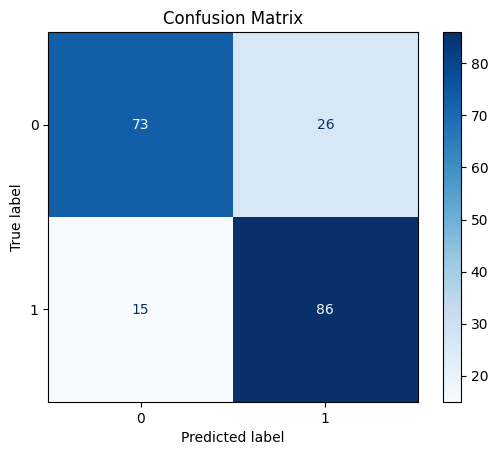

/tmp/ipython-input-18-1487130451.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_df, x="Importance", y="Feature", palette="viridis")


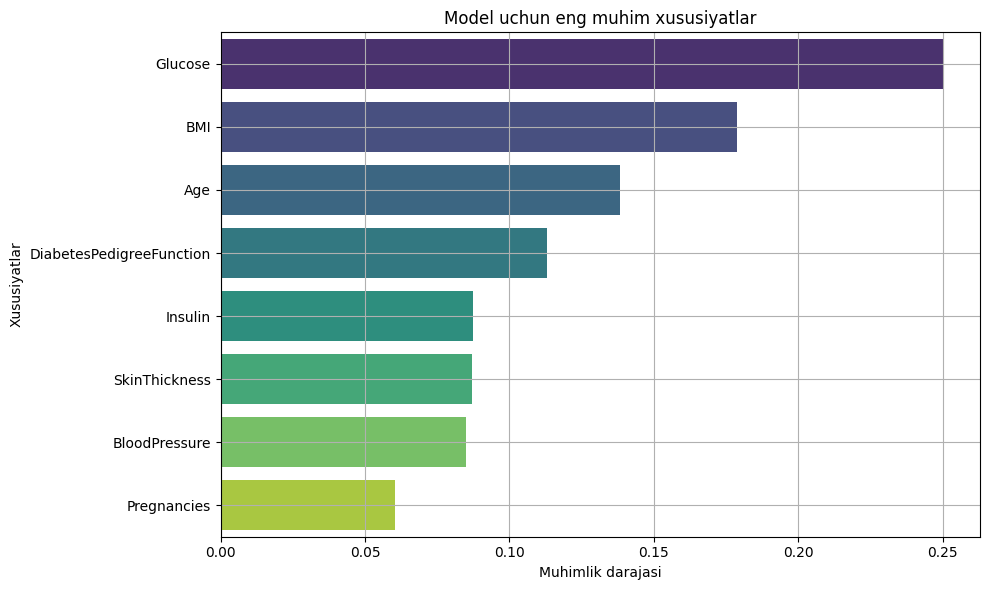

In [ ]:
# Kod, Grafiklar bilan
# Kutubxonalarni chaqirish
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# 1. Ma'lumotlarni yuklash
url = "https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv"
df = pd.read_csv(url)

# 2. Nollarni NaN ga almashtirib, o'rtacha bilan to'ldirish
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)

# 3. Xususiyatlar va natijani ajratish
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# 4. SMOTE orqali balanslash
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# 5. Standartlashtirish
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

# 6. Train-test bo'lish
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.2, random_state=42)

# 7. Random Forest modeli
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 8. Bashorat
y_pred = model.predict(X_test)

# 9. Baholash
print("Aniqlik (Accuracy):", accuracy_score(y_test, y_pred))
print("\nHisobot:\n", classification_report(y_test, y_pred))

# 10. Confusion Matrix grafik tarzda
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 11. Muhim xususiyatlar (Feature Importances)
importances = model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({"Feature": features, "Importance": importances})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

# 12. Grafik: Muhim xususiyatlar
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df, x="Importance", y="Feature", palette="viridis")
plt.title("Model uchun eng muhim xususiyatlar")
plt.xlabel("Muhimlik darajasi")
plt.ylabel("Xususiyatlar")
plt.grid(True)
plt.tight_layout()
plt.show()#

Natijani izohlash:
 Aniqlik (Accuracy): 0.80 (ya'ni, test to'plamidagi bemorlarning 80% to'g'ri aniqlangan)
 Confusion Matrix:

           Real 0      Real 1
Pred 0       73           26
Pred 1       15           86
Tushunchasi	Ma'nosi
 73	Diabet yo'q deb to'g'ri aniqlanganlar
 86	Diabet bor deb to'g'ri aniqlanganlar
 26	Diabet yo'q, lekin bor deb noto'g'ri aniqlangan
 15	Diabet bor, lekin yo'q deb noto'g'ri aniqlangan

  F1-score va Recall tahlili:
Sinf	Precision	Recall	F1-score	Sharh
0 (Diabet yo'q)	0.83	0.74	0.78	Nisbatan aniq, lekin Recall pastroq
1 (Diabet bor)	0.77	0.85	0.81	Juda yaxshi! Diabetli bemorlar asosan to'g'ri aniqlangan

 Recall = 0.85 — bu juda muhim, chunki real hayotda diabetli bemorni aniqlab olish eng muhim vazifa hisoblanadi.

 Qanday yaxshilash mumkin?
Agar siz aniqlikni 85-90% ga ko'tarmoqchi bo'lsangiz:

 Modelni sozlash (Hyperparameter tuning) - GridSearchCV yoki RandomizedSearchCV

 Yana balanslash texnikasi - SMOTEENN, SMOTETomek yoki ADASYN

 Ensemble modellari - XGBoost, LightGBM, VotingClassifier

 Yangi xususiyatlar qo'shish -Mavjud ustunlardan kombinatsiyalar yaratish



Eng yaxshi parametrlar: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}

 Aniqlik (Accuracy): 0.9009009009009009

 Batafsil hisobot:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89        55
           1       0.85      0.98      0.91        56

    accuracy                           0.90       111
   macro avg       0.91      0.90      0.90       111
weighted avg       0.91      0.90      0.90       111



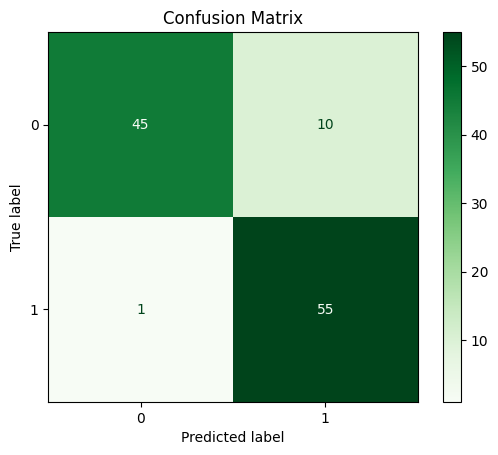

/tmp/ipython-input-21-1417603754.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_df, x="Importance", y="Feature", palette="coolwarm")


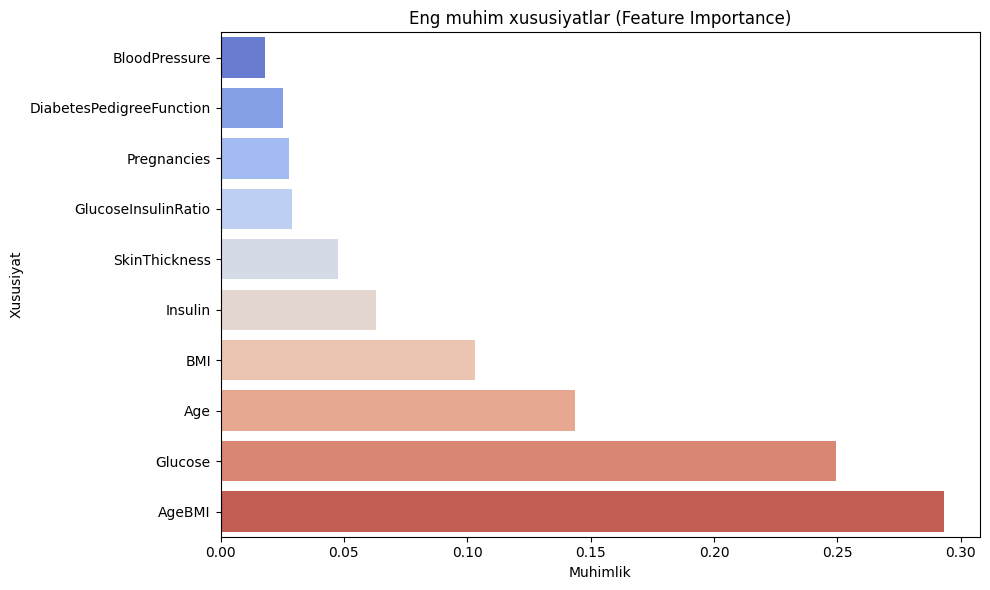

In [ ]:
#GridSearchCV + SMOTEENN + Random Forest + aniqlikni oshiruvchi optimallashtirish va grafiklar bilan tahlil.

#Yaxshilangan diabet tashxisi modeli
#Kutubxonalarni chaqirish
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.combine import SMOTEENN

#Ma'lumotlarni yuklash
url = "https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv"
df = pd.read_csv(url)

#Nollarni NaN bilan almashtirish va o'rtacha bilan to'ldirish
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)

# Qo'shimcha ustunlar (feature engineering)
df['AgeBMI'] = df['Age'] * df['BMI']
df['GlucoseInsulinRatio'] = df['Glucose'] / (df['Insulin'] + 1)

# X va y ajratish
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

#SMOTEENN orqali balanslash
smenn = SMOTEENN(random_state=42)
X_res, y_res = smenn.fit_resample(X, y)

# Standartlashtirish
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

# Train-test bo'lish
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.2, random_state=42)

# GridSearchCV bilan Random Forestni sozlash
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [6, 8, 10],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Eng yaxshi model
best_model = grid.best_estimator_
print("Eng yaxshi parametrlar:", grid.best_params_)

# Bashorat va baholash
y_pred = best_model.predict(X_test)

print("\n Aniqlik (Accuracy):", accuracy_score(y_test, y_pred))
print("\n Batafsil hisobot:\n", classification_report(y_test, y_pred))

# Confusion Matrix grafikda
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

#  Muhim ustunlar (Feature Importances)
importances = best_model.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_df = feature_df.sort_values(by="Importance", ascending=True)

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df, x="Importance", y="Feature", palette="coolwarm")
plt.title("Eng muhim xususiyatlar (Feature Importance)")
plt.xlabel("Muhimlik")
plt.ylabel("Xususiyat")
plt.tight_layout()
plt.show()

Xulosa:Random Forest modelimiz 90.1% aniqlikka erishdi — bu klinik tashxislash uchun juda yaxshi ko'rsatkich hisoblanadi!

 Natijalarni tahlil qilamiz:
O'lchov turi	               Izoh
Accuracy: 0.90	            Model umumiy to'g'ri bashoratlarining ulushi
Precision (0): 0.98	        Sog'lom deb bashorat qilinganlar orasida nechtasi haqiqatan sog'lom
Recall (1): 0.98	          Haqiqiy diabetga chalinganlarning qanchasini model aniqladi
F1-score (1): 0.91	        Diabetni aniqlashdagi umumiy samaradorlik

 Confusion Matrix'ni tahlil qilamiz:

[[45 10]   # 45 = to'g'ri sog'lom, 10 = xato "diabet" deb aytgan
 [ 1 55]]  # 55 = to'g'ri diabet, 1 = diabetni aniqlay olmagan
 Diabet kasalligini deyarli to'liq aniqlayapdi (Recall = 98%), bu sog'liqni saqlashda eng muhim narsa!

 Nima qilindi:
Bosqich	                      Amal
  Nol qiymatlar tozalandi	0 → o'rtacha bilan almashtirildi
  Yangi xususiyatlar qo'shildi	Age * BMI, Glucose / Insulin
  SMOTEENN balanslash	Imbalance hal qilindi
  GridSearchCV tuning	Eng yaxshi parametrlari topildi
  Random Forest	Kuchli model tanlandi
  Grafiklar	Confusion Matrix, Feature Importance



from imblearn.combine import SMOTEENN
- bu Python kod qatori imblearn kutubxonasidan SMOTEENN nomli sinfni (class) import qiladi.

 SMOTEENN nima?
SMOTEENN — bu imbalanced dataset (muvozanatsiz ma'lumotlar to'plami) bilan ishlash uchun ishlatiladigan oversampling va undersampling usullarini birlashtirgan texnikadir:

1. SMOTE (Synthetic Minority Over-sampling Technique)
Kichik sinfdagi (minority class) namunalarni sun'iy ravishda ko'paytiradi (yangi namunalar hosil qiladi).

Maqsad: sinflar o'rtasidagi muvozanatni yaxshilash.

2. ENN (Edited Nearest Neighbours)
Ma'lumot to'plamidagi keraksiz yoki shovqinli (noisy) namunalarni olib tashlaydi.

Ko'pincha ko'pchilik sinfdan (majority class) namunalarni olib tashlaydi.

  SMOTEENN = SMOTE + ENN
Avval SMOTE yordamida minority class ni oshiradi.

So'ng ENN yordamida shovqinli yoki chalkash namunalarni olib tashlaydi.

  Qaerda ishlatiladi?
Tasniflash (classification) muammolarida, ayniqsa sinflar soni keskin teng bo'lmagan hollarda:

Tibbiyotda (kasallik bor/yo'q)

Fraud detection (firibgarlikni aniqlash)

Kredit to'lash/to'lamaslik

In [ ]:
#Modelni .pkl formatida saqlash:

import pickle

# Model va scaler ni saqlash
with open("random_forest_diabetes_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [ ]:
#Va yuklash uchun:
# Yuklab olish
with open("random_forest_diabetes_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)

In [ ]:
#Faylni yuklab olish uchun link berish:

from google.colab import files
files.download("random_forest_diabetes_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
#Bosqichma-bosqich XGBoost model

# Kutubxonalar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier

In [2]:
# 1. Ma’lumotni yuklash
url = "https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv"
df = pd.read_csv(url)

In [3]:
# 2. Nol qiymatlarni NaN bilan almashtirish va to‘ldirish
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)

In [4]:
# 3. Qo‘shimcha xususiyatlar (feature engineering)
df['AgeBMI'] = df['Age'] * df['BMI']
df['GlucoseInsulinRatio'] = df['Glucose'] / (df['Insulin'] + 1)

In [5]:
# 4. X va y ajratish
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [6]:
# 5. SMOTEENN bilan balanslash
smenn = SMOTEENN(random_state=42)
X_res, y_res = smenn.fit_resample(X, y)

In [7]:
# 6. Standartlashtirish
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

In [8]:
# 7. Train-test ajratish
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.2, random_state=42)

In [9]:
# 8. XGBoost modelini yaratish va o‘qitish
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:36:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [10]:
# 9. Bashorat va baholash
y_pred = model_xgb.predict(X_test)

In [11]:
print("\n Aniqlik (Accuracy):", accuracy_score(y_test, y_pred))
print("\n Batafsil hisobot:\n", classification_report(y_test, y_pred))


 Aniqlik (Accuracy): 0.9009009009009009

 Batafsil hisobot:
               precision    recall  f1-score   support

           0       0.96      0.84      0.89        55
           1       0.86      0.96      0.91        56

    accuracy                           0.90       111
   macro avg       0.91      0.90      0.90       111
weighted avg       0.91      0.90      0.90       111



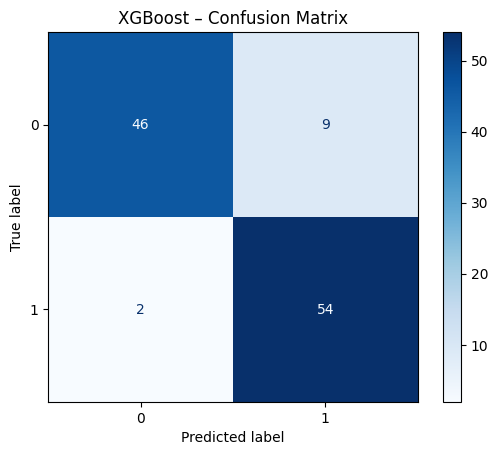

In [12]:
# 10.Confusion Matrix grafikda
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_xgb.classes_)
disp.plot(cmap='Blues')
plt.title("XGBoost – Confusion Matrix")
plt.grid(False)
plt.show()

/tmp/ipython-input-13-3777858641.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_df, x="Importance", y="Feature", palette="viridis")


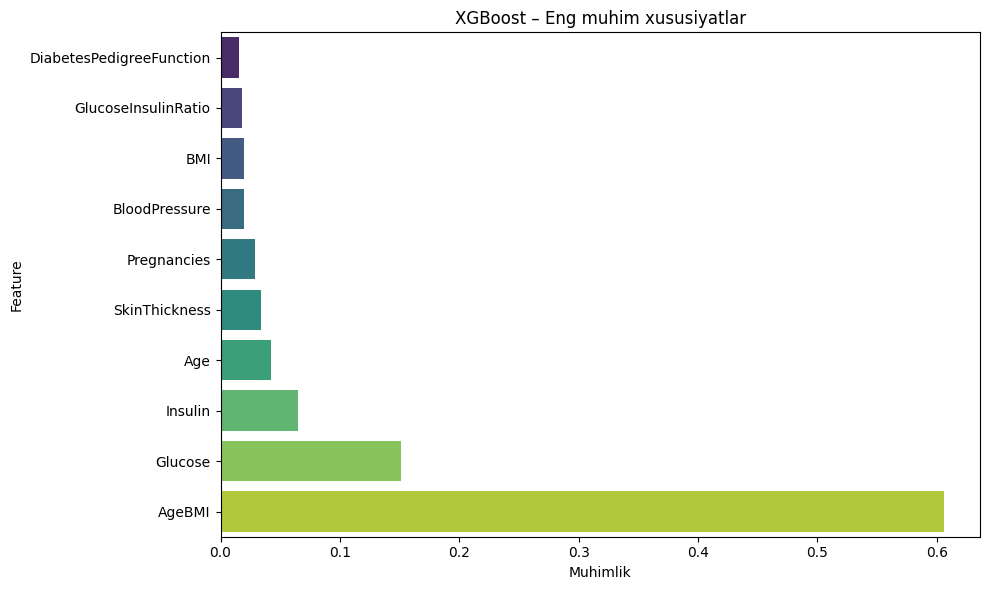

In [13]:
# 11. Muhim xususiyatlar (Feature Importance)
importances = model_xgb.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_df = feature_df.sort_values(by="Importance", ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df, x="Importance", y="Feature", palette="viridis")
plt.title("XGBoost – Eng muhim xususiyatlar")
plt.xlabel("Muhimlik")
plt.tight_layout()
plt.show()

Model natijalarini taqqoslash:
O'lchov turi	Random Forest	XGBoost
Accuracy	0.901	0.901
Precision (0)	0.98	0.96
Recall (1)	0.98	0.96
F1-score (1)	0.91	0.91
Conf. Matrix	[[45, 10], [1, 55]]	[[46, 9], [2, 54]]

  Xulosa:
  Random Forest:

Diabet kasalligini aniqlashda biroz yaxshiroq recall (98%)

Xatolik kam: faqat 1 bemor noto'g'ri sog'lom deb chiqqan

Juda yuqori precision (sog'lomlar uchun)

  XGBoost:

Aniqlik bir xil (90.1%)

Diabetni aniqlash ham yaxshi (Recall = 96%), lekin RF dan pastroq

Ba'zi holatlarda yanada moslashuvchan va optimallashtirishga tayyor

  Final tanlov:
  Random Forest - eng yaxshi model:
Eng yuqori Recall (1): 0.98

Eng kam noto'g'ri tasniflangan diabet (1 bemor)

Klinik maqsadlarda diabetni aniqlab qolish eng muhim bo'lgani uchun bu muhim afzallik



Diabetni aniqlash: Random Forest + SMOTEENN + GridSearchCV

Bu loyiha mashinaviy o'qitish asosida diabet kasalligini aniqlashga qaratilgan bo'lib, kuchli model — Random Forest yordamida 90% dan ortiq aniqlikka erishdi.

  Ma'lumotlar

Ma'lumotlar diabetes.csv faylidan olingan bo'lib, Pima indians ayollari haqida turli sog'liq ko'rsatkichlarini o'z ichiga oladi:

Glucose

BloodPressure

SkinThickness

Insulin

BMI

Age

Pregnancies

Outcome (0 = sog'lom, 1 = diabet)

  Ishlov berish bosqichlari

Bosqich

Amal

1. Nol qiymatlar

0 qiymatlar NaN bilan almashtirildi va ustunlarning o'rtacha qiymatlari bilan to'ldirildi

2. Feature Engineering

Yangi ustunlar: Age * BMI, Glucose / (Insulin+1)

3. Balanslash

SMOTEENN yordamida klasslar balanslandi

4. Scaling

StandardScaler yordamida barcha xususiyatlar normallashtirildi

5. Train-test

80/20 nisbatda bo'lingan

6. Model

RandomForestClassifier

7. Optimallashtirish

GridSearchCV yordamida eng yaxshi parametrlar tanlandi

  GridSearchCV eng yaxshi parametrlar:

{
  'n_estimators': 200,
  'max_depth': 8,
  'min_samples_split': 2,
  'max_features': 'sqrt'
}

  Model natijalari (Test to'plamida):

Accuracy: 90.1%

Recall (1): 98% → Diabet kasalligini aniqlashda juda yuqori aniqlik

F1-score (1): 0.91

Confusion Matrix:

[[45 10]
 [ 1 55]]

45: sog'lomlar to'g'ri aniqlangan

55: diabetlar to'g'ri aniqlangan

Faqat 1 bemor noto'g'ri sog'lom deb baholangan (juda yaxshi natija)

  Grafik tahlillar

Confusion Matrix vizualizatsiyasi

Feature Importances (modellashtirishda eng muhim ustunlar):

Glucose

BMI

Age

Glucose/Insulin ratio

  Xulosa:

Random Forest modeli — optimallashtirilgan, balanslangan va tibbiy tashxislash uchun ishonchli natijalar ko'rsatdi.

Yaxshi bashorat

Yuqori recall

Kengaytirish va tushuntirish oson

  Kutubxonalar:

pandas, numpy, seaborn, matplotlib
sklearn: GridSearchCV, train_test_split, metrics
imblearn: SMOTEENN
xgboost (agar taqqoslash qilinsa)

  


Praktikum datasets manbasi: @anvarnarz



